In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.decomposition import PCA

import warnings
for warning in (FutureWarning, np.ComplexWarning):
    warnings.simplefilter(action='ignore', category=warning)

To fix most errors, try running the following command in bash: `pip install --upgrade numpy sklearn scikit-image matplotlib`

## Load face data.

We will be using face data from AT&T Labs Cambridge; the data consists of pictures of 40 different subjects, each under 10 different poses. Each image is grayscale and $112 \times 92$ pixels, but we will downsize them to $56 \times 46$.

In [2]:
all_faces = []
for subject_number in range(1, 41):
    for image_number in range(1, 11):
        path = 'data/orl_faces/s{0}/{1}.jpg'.format(subject_number, image_number)
        large_image = 256 - imread(path)
        shape = large_image.shape
        small_image = resize(large_image, (shape[0] / 2, shape[1] / 2), mode='constant', anti_aliasing=True)
        all_faces.append(small_image / np.max(small_image))
all_faces = np.array(all_faces)

print("Total number of faces: {0}".format(len(all_faces)))
print("Size of each image: {0}".format(all_faces[0].shape))

Total number of faces: 400
Size of each image: (56, 46)


## Visualize a few faces.

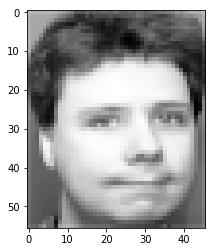

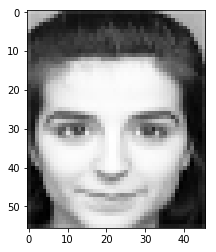

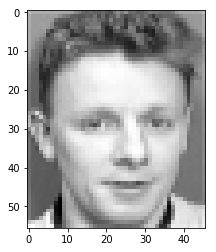

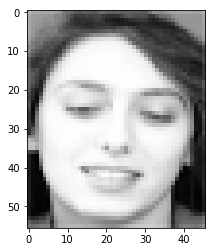

In [3]:
for i in np.random.choice(len(all_faces), size=4):
    plt.imshow(all_faces[i], cmap='Greys')
    plt.show()

## Unravel the data into vectors.

Each image is a 2D grid of $56 \times 46$ pixels, but PCA operates on vectors. So, we will unravel each image into a vector of length $56 \cdot 46 = 2576$.

In [4]:
X = np.array([face.ravel() for face in all_faces])
print("Size of each vector: {0}".format(X[0].shape))

Size of each vector: (2576,)


## Center the data and find eigenvalues of the covariance matrix.

Now, we will find the eigenvalues of the centered covariance matrix.

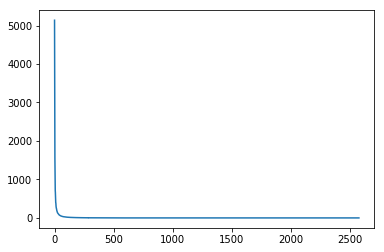

In [5]:
X_average_row = np.average(X, axis=0)
X_bar = X - X_average_row
sigma = X_bar.T.dot(X_bar)

eigenvalues, _ = np.linalg.eig(sigma)

plt.plot(np.arange(len(eigenvalues)), eigenvalues)
plt.show()

Whoa, most eigenvalues are really small! Let's zoom in.

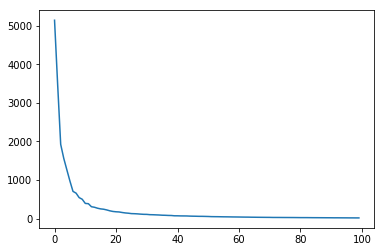

In [6]:
plt.plot(np.arange(100), eigenvalues[:100])
plt.show()

It looks like the eigenvalues die off quickly after the 50th or so. Let's do PCA onto 50 components, then.

## Perform PCA and view reconstructed images.

In [8]:
pca = PCA(n_components=50)
pca.fit(X)

X_pca = pca.transform(X)
print("Shape of data before PCA: {0}".format(X.shape))
print("Shape of data after PCA: {0}".format(X_pca.shape))

Shape of data before PCA: (400, 2576)
Shape of data after PCA: (400, 50)


Now, we'll tranform our compressed data back into the original, larger space in order to view the reconstructions.

Shape of data after reconstruction: (400, 2576)


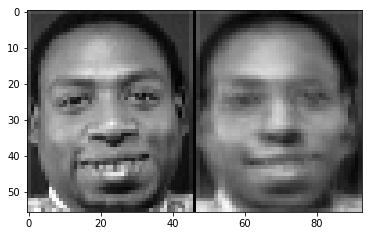

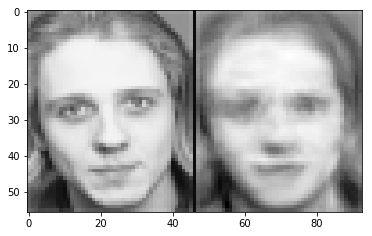

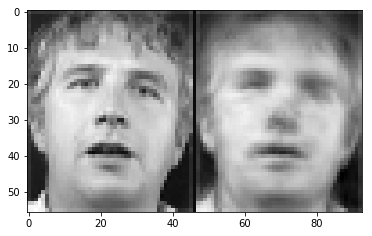

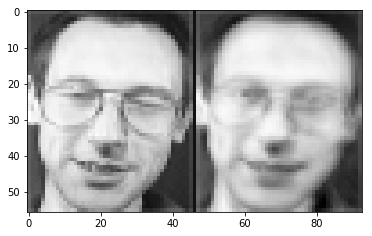

In [9]:
X_reconstructed = pca.inverse_transform(X_pca)
print("Shape of data after reconstruction: {0}".format(X_reconstructed.shape))
for i in np.random.choice(len(all_faces), size=4):
    original = X[i].reshape(56, 46)
    reconstructed = X_reconstructed[i].reshape(56, 46)
    divider = np.ones((original.shape[0], 1))
    plt.imshow(np.concatenate((original, divider, reconstructed), axis=1), cmap='Greys')
    plt.show()

Let's try different numbers of principle components. What do you think will happen when we increase the number of components? Decrease the number of components?

Performing PCA on n_components = 300 ...


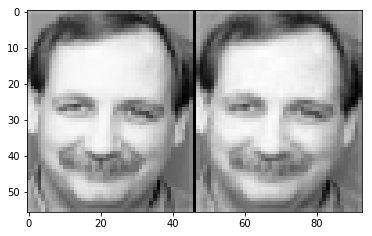

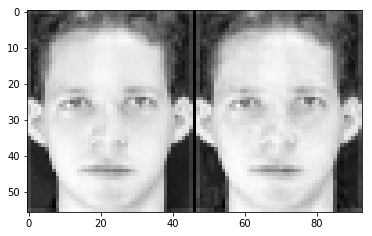

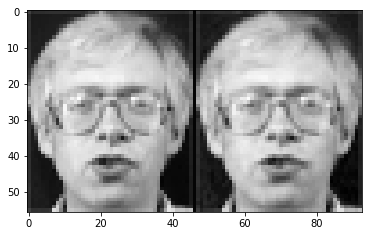

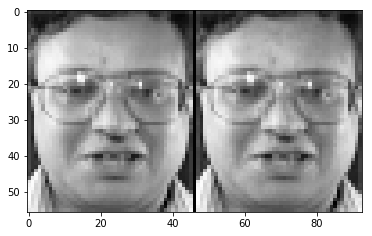

Performing PCA on n_components = 5 ...


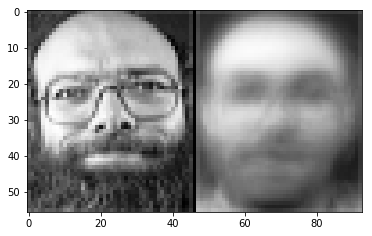

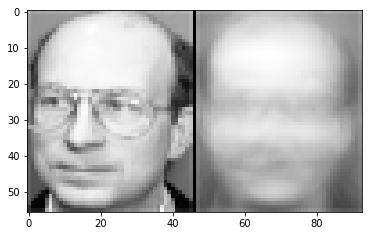

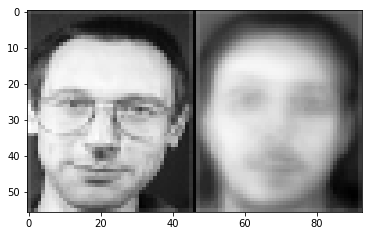

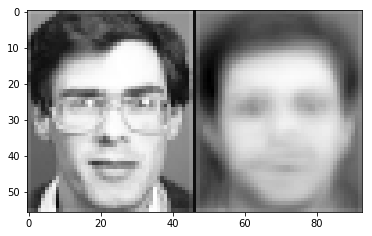

In [10]:
for n_components in (300, 5):
    
    print("Performing PCA on n_components = {0} ...".format(n_components))
    
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_reconstructed = pca.inverse_transform(pca.transform(X))
    
    for i in np.random.choice(len(all_faces), size=4):
        original = X[i].reshape(56, 46)
        reconstructed = X_reconstructed[i].reshape(56, 46)
        divider = np.ones((original.shape[0], 1))
        plt.imshow(np.concatenate((original, divider, reconstructed), axis=1), cmap='Greys')
        plt.show()